In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

/home/taras/.pyenv/versions/3.7.9/envs/asconn/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
import settings
import algoconnect
import algoconnect.functions as fn

In [3]:
session = algoconnect.Session(settings.host, settings.user, settings.password)

In [4]:
session.ping()

[(1,)]

In [5]:
resource = algoconnect.DataResource(session)

In [6]:
ds = resource.datagroups.USEquityMarketData.datasets.TradeAndQuote

In [8]:
ds.head().fetch()

,EventDateTime,EventType,Ticker,SecId,Price,Quantity,Exchange,ConditionCode
0,2022-02-01 03:59:00.106178-05:00,QUOTE BID,A,32952,0,0,EDGX,1
1,2022-02-01 03:59:00.106178-05:00,QUOTE ASK,A,32952,0,0,EDGX,1
2,2022-02-01 03:59:00.106178-05:00,QUOTE BID NB,A,32952,0,0,UNKNOWN,1
3,2022-02-01 03:59:00.106178-05:00,QUOTE ASK NB,A,32952,0,0,UNKNOWN,1
4,2022-02-01 03:59:00.158608-05:00,QUOTE BID,A,32952,0,0,BATS,1
5,2022-02-01 03:59:00.158608-05:00,QUOTE ASK,A,32952,0,0,BATS,1
6,2022-02-01 03:59:00.158608-05:00,QUOTE BID NB,A,32952,0,0,UNKNOWN,1
7,2022-02-01 03:59:00.158608-05:00,QUOTE ASK NB,A,32952,0,0,UNKNOWN,1
8,2022-02-01 04:00:00.050689-05:00,QUOTE BID NB,A,32952,0,0,EDGX,1
9,2022-02-01 04:00:00.050689-05:00,QUOTE ASK NB,A,32952,152,100,EDGX,1


In [11]:
ds.select([ds.Ticker, ds.Price, ds.Quantity]).filter(
    (fn.toDate(ds.EventDateTime) == '2022-02-01') & 
    (ds.Exchange == 'FINRA')
).head(1000).fetch()

,Ticker,Price,Quantity
0,A,139.32,1483
1,A,140.53,5
2,A,140.53,17
3,A,140.53,5
4,A,140.53,8
...,...,...,...
995,MET,67.458,18
996,MET,67.45,5
997,MET,67.45,90
998,MET,67.47,2


In [12]:
eq_trades = algoconnect.Dataset('USEquityMarketData', 'TradeOnly', session=session)

In [13]:
eq_trades.filter(
    (eq_trades.Ticker == 'AMZN') &
    (fn.toDate(eq_trades.EventDateTime) == '2022-01-20') &
    (eq_trades.Exchange == 'FINRA') &
    (eq_trades.Quantity < 100)
).head(100).fetch()

,EventDateTime,EventType,Ticker,SecId,Price,Quantity,Exchange,ConditionCode
0,2022-01-20 08:00:00.204207-05:00,TRADE,AMZN,33127,3139,2,FINRA,2147484673
1,2022-01-20 08:00:00.340423-05:00,TRADE,AMZN,33127,3142,50,FINRA,2147484673
2,2022-01-20 08:00:00.383482-05:00,TRADE,AMZN,33127,3137.89,3,FINRA,2147484673
3,2022-01-20 08:00:00.412228-05:00,TRADE,AMZN,33127,3140.4,5,FINRA,2147484673
4,2022-01-20 08:00:00.475118-05:00,TRADE,AMZN,33127,3143.0997,30,FINRA,2147484673
...,...,...,...,...,...,...,...,...
95,2022-01-20 08:01:40.541327-05:00,TRADE,AMZN,33127,3135.26,20,FINRA,2147484673
96,2022-01-20 08:02:13.634322-05:00,TRADE,AMZN,33127,3140,2,FINRA,2147484673
97,2022-01-20 08:02:37.965319-05:00,TRADE,AMZN,33127,3125.98,1,FINRA,2147484674
98,2022-01-20 08:02:38.364703-05:00,TRADE,AMZN,33127,3125.98,1,FINRA,2147484674


In [14]:
print(eq_trades.filter(
    (eq_trades.Ticker == 'AMZN') &
    (fn.toDate(eq_trades.EventDateTime) == '2022-01-20') &
    (eq_trades.Exchange == 'FINRA') &
    (eq_trades.Quantity < 100)
).head(100).sql())

SELECT *
FROM USEquityMarketData.TradeOnly
WHERE ("Ticker" = 'AMZN') AND ((toDate("EventDateTime")) = '2022-01-20') AND ("Exchange" = 'FINRA') AND ("Quantity" < 100)
LIMIT 100


In [15]:
faang = ('FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG')
eq_trades.select([
    eq_trades.Ticker,
    eq_trades.Exchange,
    fn.max(eq_trades.Price).alias('High')
]).filter(
    (eq_trades.Ticker.isin(faang)) &
    (fn.toDate(eq_trades.EventDateTime) == '2022-01-28')
).groupby([
    eq_trades.Ticker,
    eq_trades.Exchange
]).sort(eq_trades.Ticker).fetch()

,Ticker,Exchange,High
0,AAPL,AMEX,170.53
1,AAPL,BATS Y,170.34
2,AAPL,NASDAQ,170.82
3,AAPL,CSE,170.35
4,AAPL,NSE,170.315
...,...,...,...
75,NFLX,NSE,386.04
76,NFLX,AMEX,384.77
77,NFLX,CSE,384.84
78,NFLX,BATS Y,387.56


In [16]:
ohlc = resource.datagroups.USEquityMarketData.datasets.PrimaryAdjustedOHLCDaily

In [17]:
df = ohlc.select([
    ohlc.TradeDate, ohlc.ClosePrice, ohlc.ListedMarketHoursVolume.alias('Volume')
]).filter(
    (ohlc.Ticker == 'IBM') &
    (ohlc.TradeDate >= '2022-01-01') & 
    (ohlc.TradeDate < '2022-04-01')
).fetch()

Text(0, 0.5, 'Price')

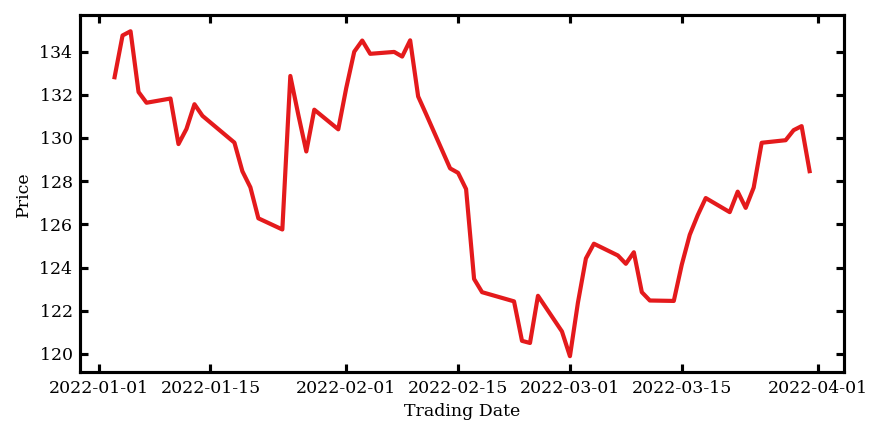

In [18]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=150)
ax.plot(pd.to_datetime(df.TradeDate), df.ClosePrice)
ax.set_xlabel('Trading Date')
ax.set_ylabel('Price')

In [19]:
ds = resource.datagroups.USEquityMarketData.datasets.TradeOnlyAdjustedMinuteBar

In [20]:
df = ds.select([
    ds.BarDateTime, ds.LastTradePrice
]).filter(
    (ds.Ticker == 'IBM') &
    (ds.BarDateTime >= '2022-01-20 09:30:00') & 
    (ds.BarDateTime < '2022-01-20 16:00:00')
).fetch()

Text(0, 0.5, 'Price')

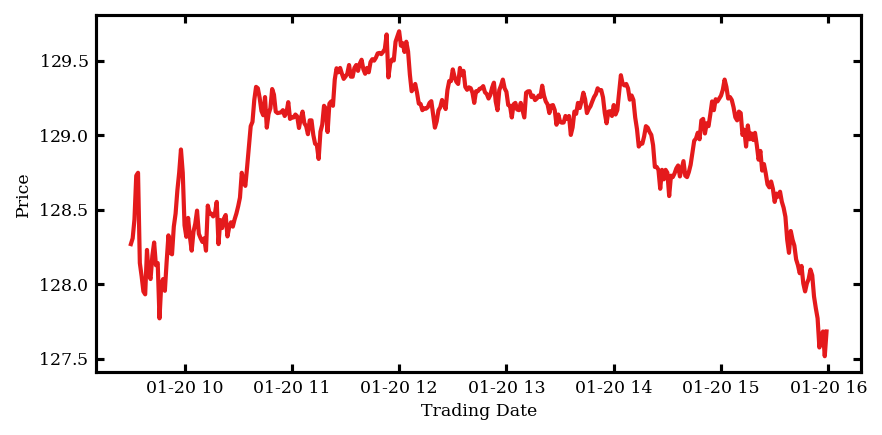

In [21]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=150)
ax.plot(pd.to_datetime(df.BarDateTime), df.LastTradePrice)
ax.set_xlabel('Trading Date')
ax.set_ylabel('Price')

In [22]:
df = eq_trades.select([
    eq_trades.EventDateTime, eq_trades.Price
]).filter(
    (eq_trades.Ticker == 'IBM') &
    (eq_trades.EventDateTime >= '2022-01-20 15:00:00') &
    (eq_trades.EventDateTime < '2022-01-20 15:05:00')
).fetch()

Text(0, 0.5, 'Price')

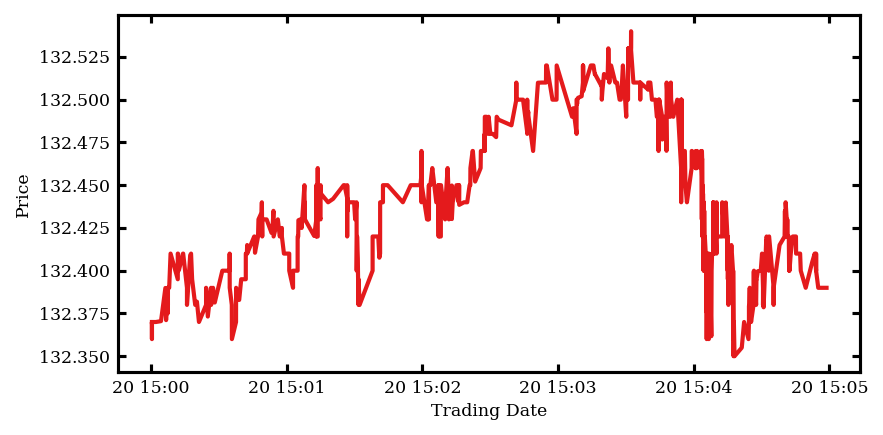

In [23]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=150)
ax.plot(pd.to_datetime(df.EventDateTime), df.Price)
ax.set_xlabel('Trading Date')
ax.set_ylabel('Price')